In [ ]:
# Most of the Matplotlib utilities lies under the pyplot submodule, and are usually imported under the plt alias:

import matplotlib.pyplot as plt

There are essentially two ways to use Matplotlib:  

1. An explicit "Axes" interface that uses methods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.

2. An implicit "pyplot" interface that keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants.

In addition, a number of downstream libraries (like pandas) offer a plot method implemented directly on their data classes so that users can call data.plot()

## The explicit "Axes" interface

First, we will mention some of the Matplotlib objects and their hierarchy.  
In Matplotlib, a plot is a hierarchy of nested Python objects. It means there is a tree-like structure of Matplotlib objects underlying each plot.
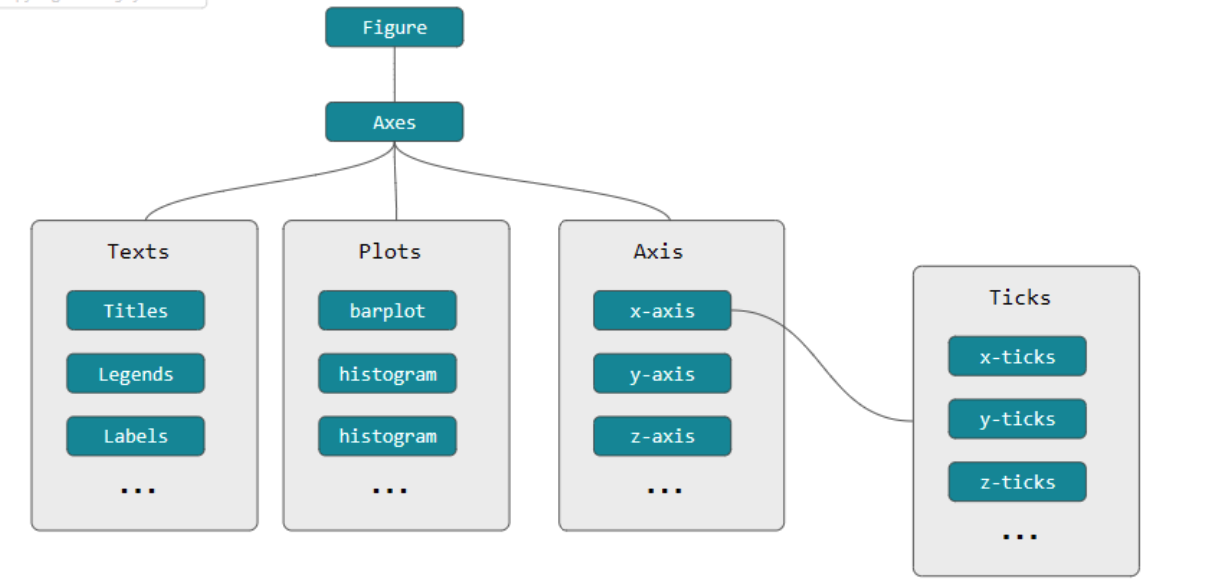  
You can think of the entire plot as an object hierarchy with **figure** at the top. Figure is followed by **axes** (not same as axis) and axes can have different kind of texts, plots, axis... There are then new branches that can go from each axis, plot, text etc. Here you can see **ticks** as a branch of *axis*  
  
    
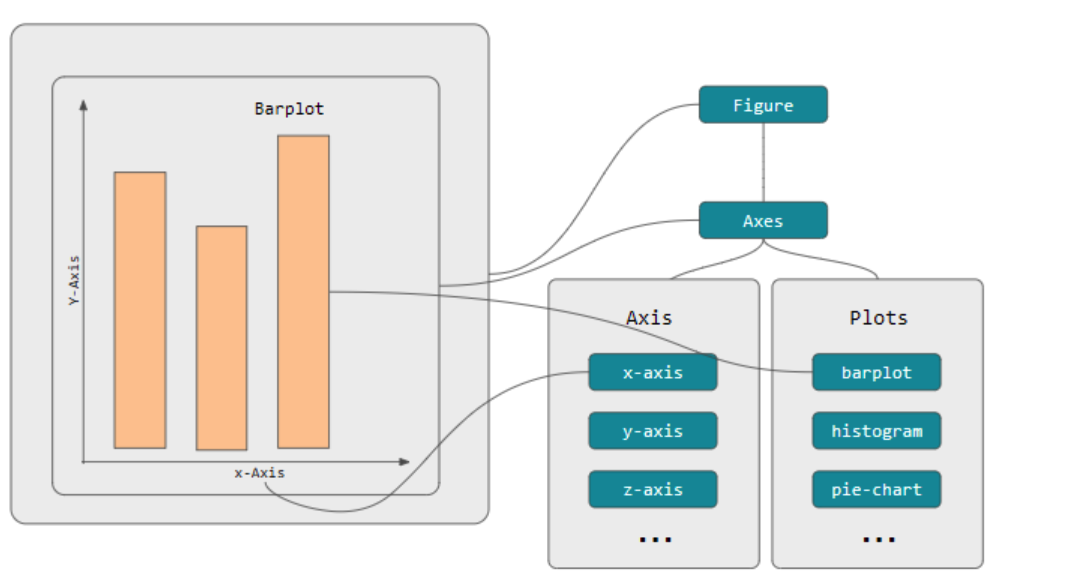  
This is how those objects are structured on a plot.

### Figure and axis

In [ ]:
# let's create some dummy data
import numpy as np

x=np.arange(10)
y=x**2
print(f'x: {x}')
print(f'y: {y}')

x: [0 1 2 3 4 5 6 7 8 9]
y: [ 0  1  4  9 16 25 36 49 64 81]


This interface works by instantiating an instance of a <a class="reference internal" href="../figure_api.html#matplotlib.figure.Figure" title="matplotlib.figure.Figure"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Figure</span></code></a> class , using a subplots method (or similar) on that object to create one or more <a class="reference internal" href="../axes_api.html#matplotlib.axes.Axes" title="matplotlib.axes.Axes"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes</span></code></a> objects , and then calling drawing methods on the Axes (e.g. plot):

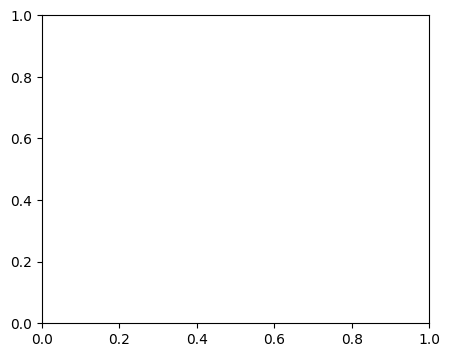

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,4)) #use figsize to change the size of a figure -> all objects inside will follow the settings
                                            # 1,1 indicates 1 row 1 column

With the code above we got a figure with one empty ax.  
Let's now **plot** some data on our ax.

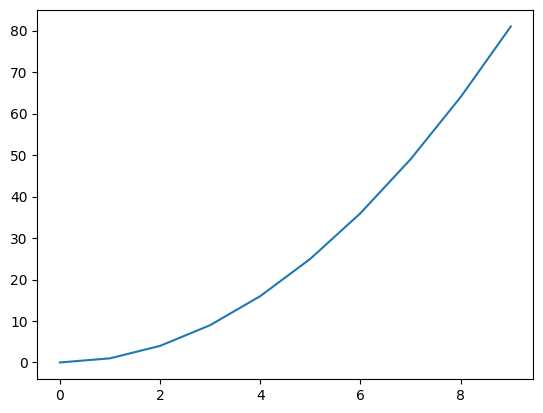

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y);

On the same axes, we can add more components, we can plot, change appearance, change limits and many more things.  
Visit the official documentation to find what you need for your visualisation https://matplotlib.org/stable/api/axes_api.html#the-axes-class

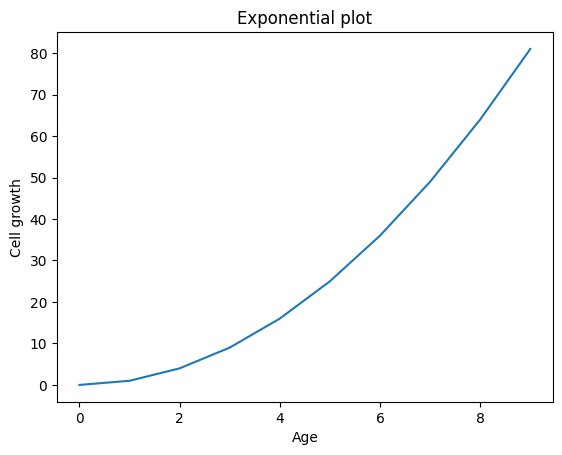

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y)

# Setting a title
ax.set_title("Exponential plot")

# Setting x and y axis labels
ax.set_xlabel("Age")
ax.set_ylabel("Cell growth");

# TIP: you can put ; at the end of a last line to prevent some informative text to be printed

We can set multiple datasets on the same ax and they will share the same axis:

In [ ]:
#more data to be plotted
y2 = x**3
x2=np.arange(20,30)

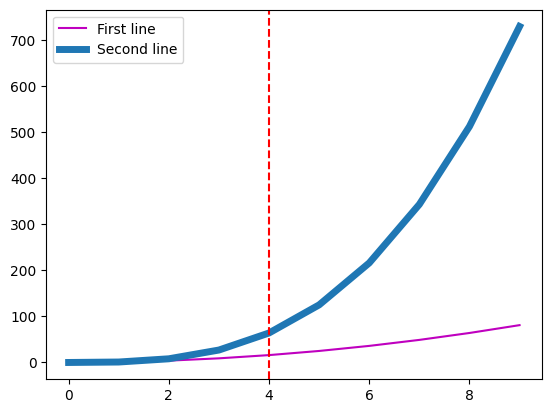

In [ ]:
fig, ax = plt.subplots(1,1)

# setting plot color to magenta by changing the property color
ax.plot(x,y,color='m')
# setting plot linewidth to 5
ax.plot(x,y2,linewidth=5);

# setting a legend for different data
ax.legend(['First line', 'Second line'])

# add a vertical line at x=4 and setting a color to red, and linestyle to dashed line
ax.axvline(x=4,color='r',linestyle='--');



As you can see, each one of the objects added to the plot has it's own properties that can be changed.  
You can always find those properties in matplotlib official documentation:  
axvline -> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline  
legend -> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend  
plot-> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot  

There are two approaches you can use when changing or updating objects on an axes.  
You can use Axes own properties and methods  
or  
You can retrieve the exact object and use it directly

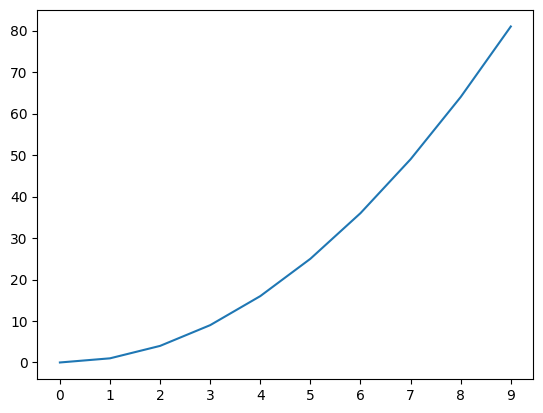

In [ ]:
# lets set the ticks on the x-axis to show all numbers 0-9

fig, ax = plt.subplots(1,1)
ax.plot(x,y)

# first approach
# ax.set_xticks(x);

#second approach
xaxis = ax.get_xaxis() # get the child object xaxis and create a variable
xaxis.set_ticks(x);    # use child object and it's methods https://matplotlib.org/stable/api/axis_api.html

So far, we have used only one subplot. Let's try and create 2 subplots on the same figure

In [ ]:
x1 = np.arange(10)
y1 = x1**2

x2 = np.arange(20,30)
y2 = x2**2

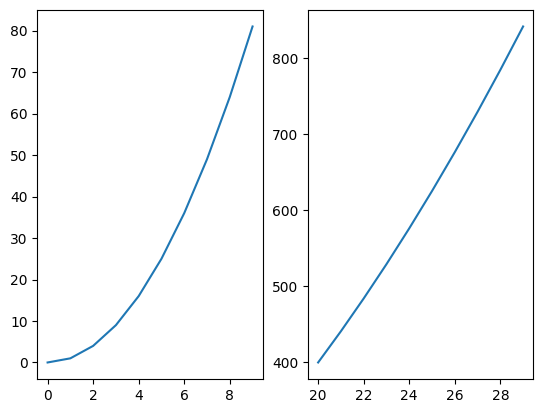

In [ ]:
fig,ax = plt.subplots(1,2)  # 1,2 says there is 1 row and 2 columns, so there will be 2 subplots

# Since there are 2 subplots, we also have two axes.
ax[0].plot(x1,y1)
ax[1].plot(x2,y2);

### Real-data example

In [ ]:
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
314,Gentoo,Biscoe,44.5,14.7,214.0,4850.0,Female
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male


In [ ]:
penguins_bar = penguins[['species','island']].groupby('species').agg({'island':'count'}).reset_index()
penguins_bar

,species,island
0,Adelie,152
1,Chinstrap,68
2,Gentoo,124


Plotting on axes doesnt always have to be with .plot() There are many different methods (https://matplotlib.org/stable/api/axes_api.html#plotting)  
Using .bar() we can plot a bar chart.

bars are of type <class 'matplotlib.container.BarContainer'>
bar is of type <class 'matplotlib.patches.Rectangle'>
ylabel is of type <class 'matplotlib.text.Text'>
title is of type <class 'matplotlib.text.Text'>
bar_label is of type <class 'matplotlib.text.Annotation'>


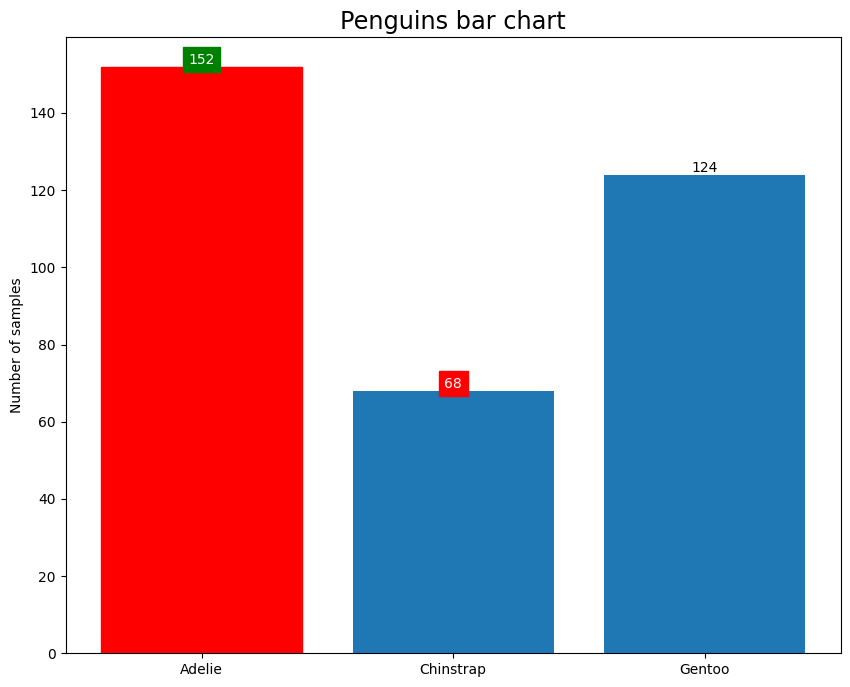

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

bars = ax.bar(x=penguins_bar['species'], height=penguins_bar['island'])
print(f'bars are of type {type(bars)}')
print(f'bar is of type {type(bars[0])}')
ylabel = ax.set_ylabel('Number of samples')
print(f'ylabel is of type {type(ylabel)}')

title = ax.set_title('Penguins bar chart')
print(f'title is of type {type(title)}')

title.set_fontsize('xx-large')
bar_labels = ax.bar_label(bars);
print(f'bar_label is of type {type(bar_labels[0])}')

bars[0].set(color='r')
bar_labels[1].set(backgroundcolor='r',color='w')
bar_labels[0].set_backgroundcolor('g')
bar_labels[0].set_color('w')

#### Using pandas.plot

In [ ]:
penguins_bar_pandas = penguins[['species','island']].groupby('species').agg({'island':'count'})
penguins_bar_pandas

,island
species,
Adelie,152
Chinstrap,68
Gentoo,124


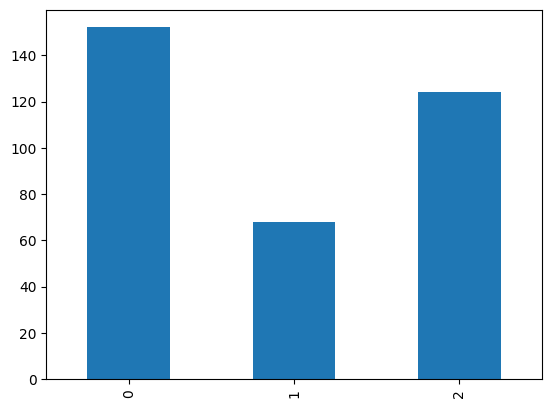

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

penguins_bar.plot.bar(legend=False);

Matplotlib's documentation and examples use both the OO and the pyplot styles. In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.